In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from Mine import *
from main import *

In [2]:
with open('param.json', 'r') as f:
    param = json.load(f)

# Run the experiment
results = std(param, for_internal_use=True)
with open('stats.json', 'w') as f:
    json.dump(results, f)

End
Processing time  0:00:00.365147
Truck0: 	Failures = 2 	 Preventive = 21
Truck1: 	Failures = 2 	 Preventive = 18
Truck2: 	Failures = 15 	 Preventive = 5
Truck3: 	Failures = 13 	 Preventive = 10
Truck4: 	Failures = 6 	 Preventive = 10
Truck5: 	Failures = 7 	 Preventive = 13
Truck6: 	Failures = 7 	 Preventive = 15
Truck7: 	Failures = 7 	 Preventive = 26
Truck8: 	Failures = 6 	 Preventive = 23
Truck9: 	Failures = 18 	 Preventive = 9
Shovel0:	Failures = 0 	 Preventive = 30
Shovel1:	Failures = 0 	 Preventive = 27
Shovel2:	Failures = 0 	 Preventive = 21


In [3]:
with open('stats.json', 'r') as f:
    stats = json.load(f)

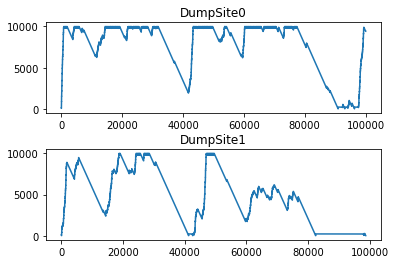

In [4]:
for i in range(2):
    data = np.array(stats["DumpSite%d_stockpileLevel" % i])
    plt.subplot(2,1,i+1)
    plt.step(data[:,0], data[:,1])
    plt.title("DumpSite%d" % i)
plt.subplots_adjust(hspace=.4)
plt.show()

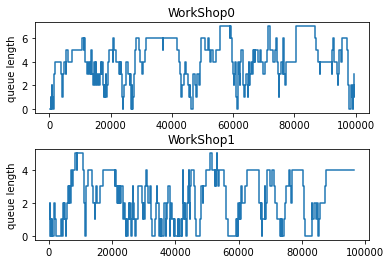

In [5]:
for i in range(2):
    data = np.array(stats["WorkShop%d_queue"%i])
    plt.subplot(2,1,i+1)
    plt.step(data[:,0], data[:,1])
    plt.title("WorkShop%d"%i)
    plt.ylabel("queue length")
plt.subplots_adjust(hspace=.4)
plt.show()

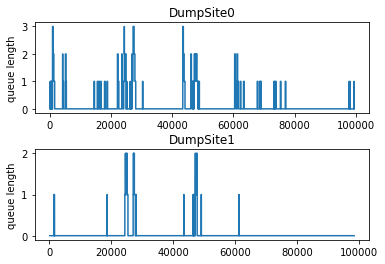

In [6]:
for i in range(2):
    data = np.array(stats["DumpSite%d_queue"%i])
    plt.subplot(2,1,i+1)
    plt.step(data[:,0], data[:,1])
    plt.title("DumpSite%d"%i)
    plt.ylabel("queue length")
plt.subplots_adjust(hspace=.4)
plt.show()

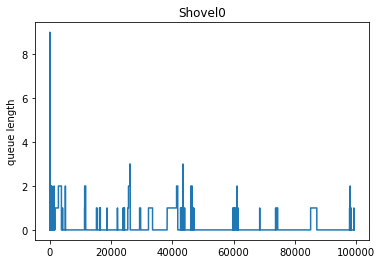

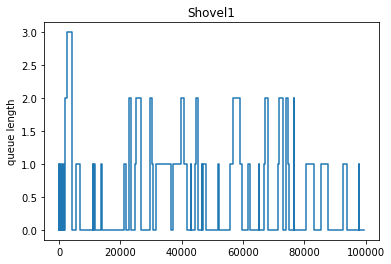

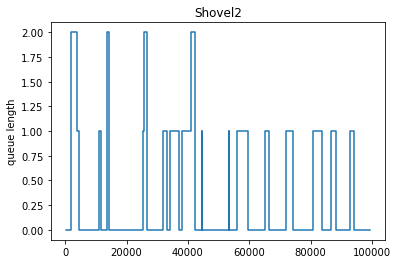

In [7]:
for i in range(3):
    data = np.array(stats["Shovel%d_queue"%i])
    plt.step(data[:,0], data[:,1])
    plt.title("Shovel%d"%i)
    plt.ylabel("queue length")
    plt.show()

## Analysis of system configuration
All the possible configurations of the system are tested with two and three workshops. The configurations with a high number of items are expected to perform better when there are three workshops.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w1 = np.genfromtxt("results/config_optimization1s.csv", delimiter=",")
w2 = np.genfromtxt("results/config_optimization2s.csv", delimiter=",")
w3 = np.genfromtxt("results/config_optimization3s.csv", delimiter=",")

w1 = np.array(w1)
w2 = np.array(w2)
w3 = np.array(w3)
w1[:,3] = w1[:,3]/1e3
w2[:,3] = w2[:,3]/1e3
w3[:,3] = w3[:,3]/1e3
w1[:,2] = w1[:,2]/1e4
w2[:,2] = w2[:,2]/1e4
w3[:,2] = w3[:,2]/1e4

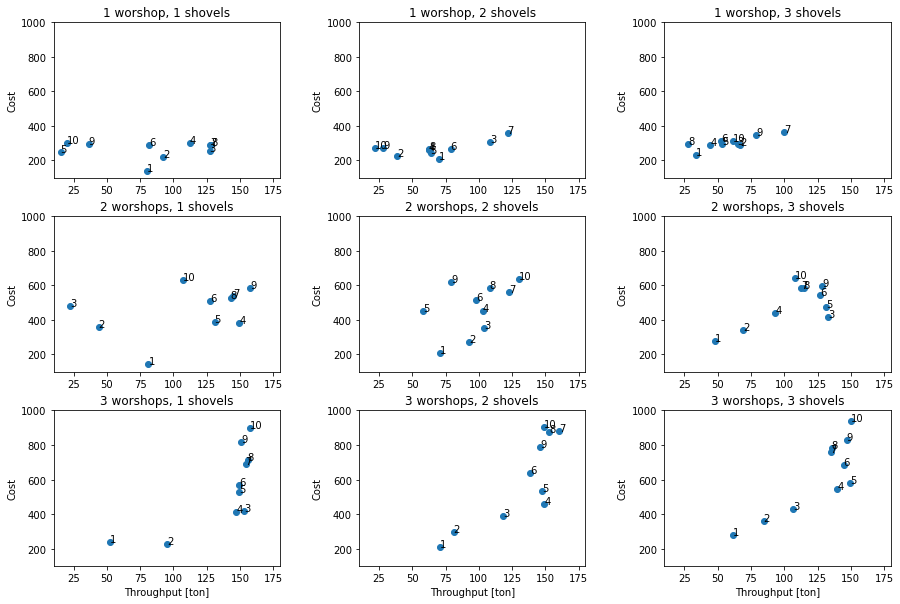

In [3]:
f, ax = plt.subplots(3, 3, figsize = (15, 10))
for i in range(3):
    # 1 Workshop
    plt.subplot(3,3,i+1)
    plt.scatter(w1[i*10:(i+1)*10,2],w1[i*10:(i+1)*10,3])
    for j in range(10):
        plt.annotate(str(j+1), (w1[i*10+j,2],w1[i*10+j,3]))
    plt.xlim(0.1*1e2, 1.8*1e2)
    plt.ylim(1e2,1e3)
    plt.ylabel("Cost")
    plt.title(f"1 worshop, {i+1} shovels")
    # 2 Workshops
    plt.subplot(3,3,i+4)
    plt.scatter(w2[i*10:(i+1)*10,2],w2[i*10:(i+1)*10,3])
    for j in range(10):
        plt.annotate(str(j+1), (w2[i*10+j,2],w2[i*10+j,3]))
    plt.xlim(0.1*1e2, 1.8*1e2)
    plt.ylim(1e2,1e3)
    plt.ylabel("Cost")
    plt.title(f"2 worshops, {i+1} shovels")
    # 3 Workshops
    plt.subplot(3,3,i+7)
    plt.scatter(w3[i*10:(i+1)*10,2],w3[i*10:(i+1)*10,3])
    for j in range(10):
        plt.annotate(str(j+1), (w3[i*10+j,2],w3[i*10+j,3]))
    plt.ylabel("Cost")
    plt.xlabel("Throughput [ton]")
    plt.title(f"3 worshops, {i+1} shovels")
    plt.xlim(0.1*1e2, 1.8*1e2)
    plt.ylim(1e2,1e3)
plt.subplots_adjust(hspace=.25, wspace=.35)
plt.savefig("figures/multi_criteria.png", dpi=600)

In [4]:
w2 = np.genfromtxt("results/config_optimization2h.csv", delimiter=",")
w3 = np.genfromtxt("results/config_optimization3h.csv", delimiter=",")


w2 = np.array(w2)
w3 = np.array(w3)

w2[:,3] = w2[:,3]/1e3
w3[:,3] = w3[:,3]/1e3

w2[:,2] = w2[:,2]/1e4
w3[:,2] = w3[:,2]/1e4

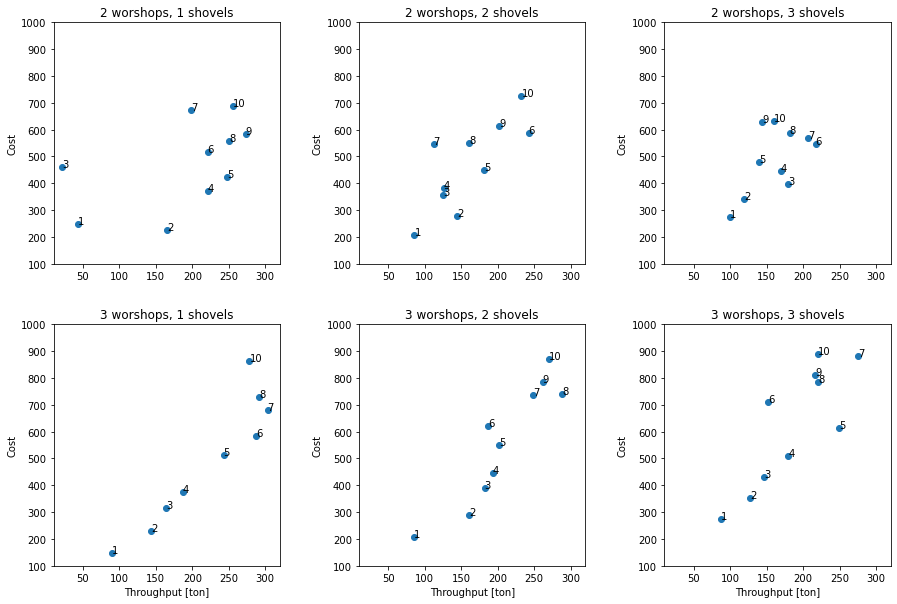

In [8]:
f, ax = plt.subplots(2, 3, figsize = (15, 10))
for i in range(3):
    # 1 Workshop
#     plt.subplot(3,3,i+ùhop, {i+1} shovels")
    # 2 Workshops
    plt.subplot(2,3,i+1)
    plt.scatter(w2[i*10:(i+1)*10,2],w2[i*10:(i+1)*10,3])
    for j in range(10):
        plt.annotate(str(j+1), (w2[i*10+j,2],w2[i*10+j,3]))
    plt.xlim(0.1*1e2, 3.2*1e2)
    plt.ylim(1e2,1e3)
    plt.ylabel("Cost")
    plt.title(f"2 worshops, {i+1} shovels")
    # 3 Workshops
    plt.subplot(2,3,i+4)
    plt.scatter(w3[i*10:(i+1)*10,2],w3[i*10:(i+1)*10,3])
    for j in range(10):
        plt.annotate(str(j+1), (w3[i*10+j,2],w3[i*10+j,3]))
    plt.ylabel("Cost")
    plt.xlabel("Throughput [ton]")
    plt.title(f"3 worshops, {i+1} shovels")
    plt.xlim(0.1*1e2, 3.2*1e2)
    plt.ylim(1e2,1e3)
plt.subplots_adjust(hspace=.25, wspace=.35)
plt.savefig("figures/multi_criteria.png", dpi=600)